✍ Настало время попрактиковаться в использовании деревьев решений и случайного леса для решения задачи классификации.

Продолжим решение задачи об оттоке клиентов банка, которую мы решали в юните 4. Ранее мы построили модель логистической регрессии, затем добавили в модель полиномиальные признаки и подобрали оптимальный порог вероятности для логистической регрессии.

→ Теперь попробуем решить задачу с помощью деревьев решений и лесов.

Деревья решений — алгоритм, способный уловить нелинейные зависимости. Генерация полиномиальных признаков практически не имеет значения.

Поэтому для решения задачи используйте обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки без полиномиальных столбцов.

Задание 7.1 В файле **AbultClassification** Хотя не разбериха в курсе, и не правильные ссылки на файлы и ноутбук.

Обучите на обучающей выборке дерево решений с максимальной глубиной 8. В качестве критерия информативности используйте энтропию Шеннона. Минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

Сделайте предсказания для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на каждой из выборок? Ответ округлите до двух знаков после точки-разделителя.

In [6]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import ensemble # для деревьев решенгий

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']

# Сразу избавимся от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента.

churn_data = churn_data.drop(['Geography', 'RowNumber', 'CustomerId', 'Surname'], axis=1)

churn_data['BalanceSalaryRatio'] = churn_data['Balance']/churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure']/(churn_data['Age'])
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore']/(churn_data['Age'])

# Также перекодируем единственный текстовый категориальный признак Gender в бинарный столбец (1 — 'Male', 0 — 'Female'):

churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
churn_data.head()

X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#  Выполним разбиение, установив значением параметра random_state число 0:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=0)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))


Train shape: (1881, 12)
Test shape: (628, 12)


In [7]:
from sklearn import tree


dt = tree.DecisionTreeClassifier(
    max_depth=8, 
    criterion='entropy', 
    random_state=42,
    min_samples_leaf=10
)
 
dt.fit(X_train, y_train)
 
y_train_pred= dt.predict(X_train)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
 
y_test_pred = dt.predict(X_test)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train F1: 0.72
Test F1: 0.64


Задание 7.2

Постройте случайный лес из 500 деревьев с максимальной глубиной 8. Критерий информативности — энтропия Шеннона. Минимальное число объектов в листе (количество объектов, при которых дерево прекратит делиться и образуется лист) — 10.

В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

Сделайте предсказания для тренировочной и тестовой выборок.

Чему равно значение целевой метрики на каждой из выборок? Ответ округлите до двух знаков после точки-разделителя.

Сравните качество одного дерева решений с качеством случайного леса на тестовой выборке. Смогли ли вы улучшить метрику?

In [12]:
#Создаём объект класса RandomForestClassifier
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf= 10,
    # max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X_train, y_train)
 
#Делаем предсказание класса
y_train_pred= rf_clf_2d.predict(X_train)
print('Train F1: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
 
y_test_pred = rf_clf_2d.predict(X_test)
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))


Train F1: 0.74
Test F1: 0.66


Задание 7.4

Финальные штрихи

Попробуйте подобрать значение порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке. Используйте модель, которая показала наилучшее качество.

В качестве порога вероятности используйте значения из следующего диапазона:

thresholds = np.arange(0.1, 1, 0.05)
Напомним, как определить оптимальный порог вероятности:

Предсказать вероятности оттока для каждого клиента из тестовой выборки.
В цикле перебирать значения порогов вероятности threshold.
Сделать предсказание класса по принципу: если вероятность  threshold, отнести объект к классу 1, в противном случае — к классу 0.
Рассчитать метрику и занести её в заранее созданный список.
Постройте график зависимости целевой метрики от порога вероятности.

Какому порогу вероятности соответствует наибольшее значение целевой метрики? Ответ округлите до двух знаков после точки-разделителя.

In [18]:
#Считаем вероятности ухода каждого клиента
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = rf_clf_2d.predict_proba(X_test)[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Клиент, для которых вероятность ухода > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    f1_scores.append(metrics.f1_score(y_test, y_pred))

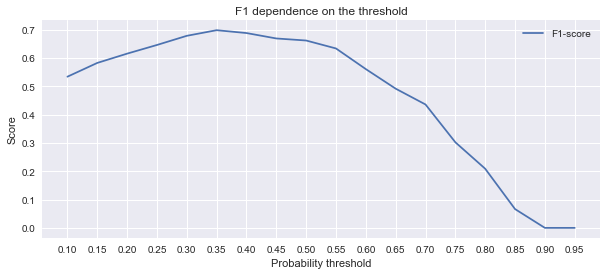

In [20]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость

ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

Задание 7.5

Сделайте предсказание на тестовой выборке с подобранным порогом вероятности. Используйте модель, показавшую наилучшее качество.

Чему равно значение целевой метрики на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [22]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.35

y_test_pred_opt = y_proba_pred.apply(lambda x:1 if x > threshold_opt else 0)

#Считаем метрики
print('Test F1: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred_opt)))

Test F1: 0.70


ДОПОЛНИТЕЛЬНО:

[Набор датасетов](https://tproger.ru/translations/the-best-datasets-for-machine-learning-and-data-science/), в том числе для классификации, на которых вы можете попрактиковаться.
Вывод всех формул по логистической регрессии в статье [«Пережёвывая логистическую регрессию»](https://habr.com/ru/post/485872/).